# 第２部 実践編 ①：機械学習
## 第３章：顧客の全体像を把握する 10本ノック (p.63~)

> ## 準備

In [1]:
# drive にマウント
from google.colab import auth, drive, files, output
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# フォルダーに移動
% cd /content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100/

/content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100


In [3]:
% ls サンプルコード_20200325/3章

3章_顧客の全体像を把握する１０本ノック_answer.ipynb  customer_joined.csv
3章_顧客の全体像を把握する１０本ノック.ipynb         customer_master.csv
campaign_master.csv                                  use_log.csv
class_master.csv


In [4]:
# 日本語フォント用
!pip install japanize-matplotlib

In [5]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Config
PATH = './サンプルコード_20200325/3章/'

> ## ノック 21: データを読み込んで把握しよう

In [8]:
# 会員区分
class_master = pd.read_csv(PATH + 'class_master.csv')
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [9]:
# 入会時のキャンペーン区分
campaign_master = pd.read_csv(PATH + 'campaign_master.csv')
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [10]:
# 顧客データ
customer_master = pd.read_csv(PATH + 'customer_master.csv')
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [11]:
# ユーザーの利用履歴
use_log = pd.read_csv(PATH + 'use_log.csv')
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


> ## ノック 22: 顧客データを整形しよう

In [12]:
customer_joined = pd.merge(customer_master, class_master, how='left', on='class')
customer_joined = pd.merge(customer_joined, campaign_master, how='left', on='campaign_id')
customer_joined.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [13]:
print(customer_joined.isnull().sum())
print('Table size : ', customer_joined.shape)

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64
Table size :  (4192, 11)


- end_date が null のデータは解約していない客であると考えられる
- 全体の約 30% が計測期間終了時で解約済み 

In [14]:
customer_joined.dtypes

customer_id      object
name             object
class            object
gender           object
start_date       object
end_date         object
campaign_id      object
is_deleted        int64
class_name       object
price             int64
campaign_name    object
dtype: object

> ## ノック23:顧客データの基礎集計をしよう

In [15]:
def show_distribution(df, col):
  classes = pd.value_counts(df[col], sort=True)
  classes.plot(kind='bar')
  plt.title(col)
  plt.show()

def show_joint_distribution(df, col1, col2):
  df_stacked = df.groupby([col1, col2]).size().unstack(1)
  df_stacked.plot(kind='bar', stacked=True)
  plt.legend(loc = 'upper right')
  plt.title(col1 + ' x ' + col2)
  plt.show()

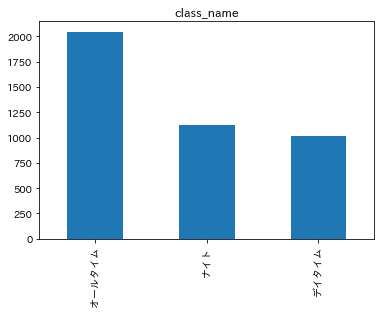

In [16]:
# クラスごとの分布
show_distribution(customer_joined, 'class_name')

- オールタイムの利用者が圧倒的に多い

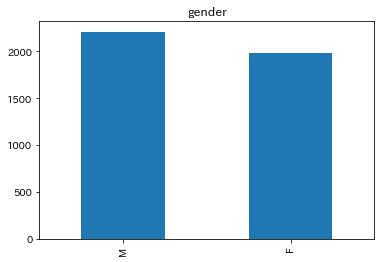

In [17]:
# 性別ごとの分布
show_distribution(customer_joined, 'gender')

- 男性客が女性を若干上回っている

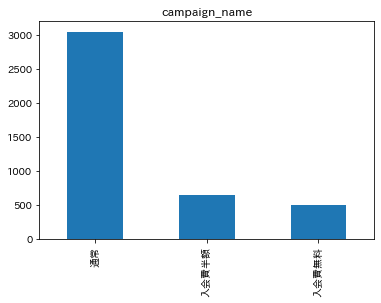

In [18]:
# キャンペーンごとの分布
show_distribution(customer_joined, 'campaign_name')

- 通常の入会者が圧倒的に多い

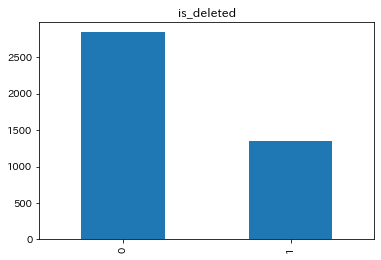

In [19]:
# 退会者の分布
show_distribution(customer_joined, 'is_deleted')

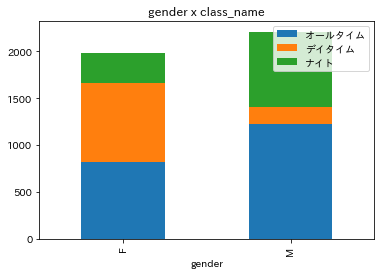

In [20]:
# 性別ごとのクラス内訳
show_joint_distribution(customer_joined,  'gender', 'class_name')

- 男性に比べて女性はデイタイムの利用が多い 
- 夜は男性の利用が多い

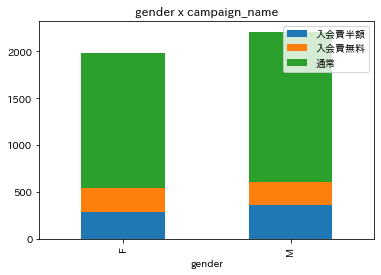

In [21]:
# 性別ごとのキャンペーン内訳
show_joint_distribution(customer_joined,  'gender', 'campaign_name')

- 大きな差は見られない

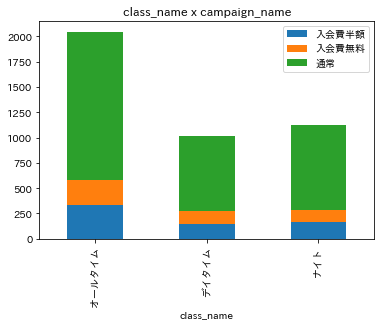

In [22]:
# クラスごとのキャンペーン内訳
show_joint_distribution(customer_joined,  'class_name', 'campaign_name')

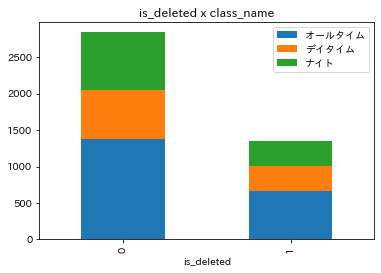

In [23]:
# クラスごとの退会者の分布
show_joint_distribution(customer_joined,  'is_deleted', 'class_name')

- 得に大きな違いはない

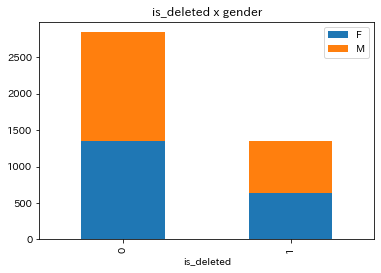

In [24]:
# 性別ごとの退会者の分布
show_joint_distribution(customer_joined,  'is_deleted', 'gender')

- 得に大きな違いはない

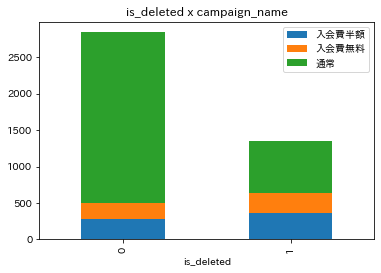

In [25]:
# キャンペーンごとの退会者の分布
show_joint_distribution(customer_joined,  'is_deleted', 'campaign_name')

- 通常と比べて, 入会半額と無料の人の方が相対的な離脱者が多い

Text(0.5, 1.0, 'キャンペーン別時系列入会者数')

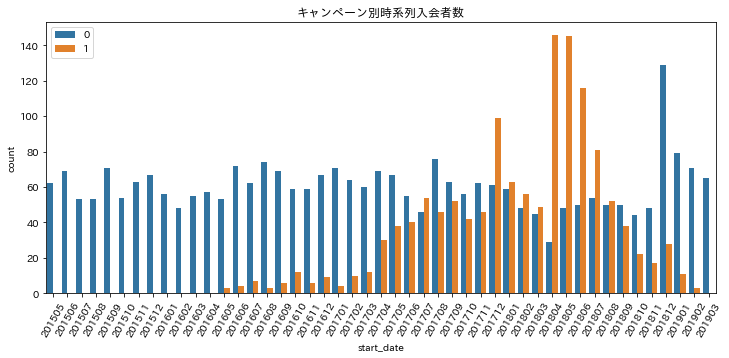

In [59]:
# 入会者数と退会者数の変化
# (プロット方法はHarukaちゃんのコードを参考にしました)
plt.figure(figsize=(12,5))
plt.xticks(rotation=60)
sns.countplot(customer_joined['start_date'].dt.strftime('%Y%m'), hue=customer_joined['is_deleted'])
plt.legend(loc='upper left')
plt.title('キャンペーン別時系列入会者数')

- 2018年4月あたりに入会した人が退会しているよう 
- キャンペーン時の入会者?

Text(0.5, 1.0, 'キャンペーン別時系列入会者数')

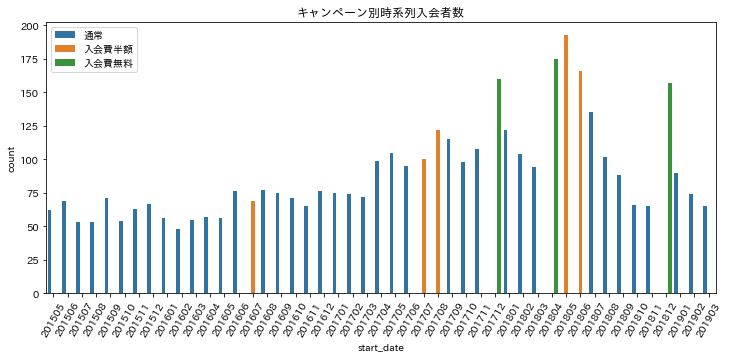

In [60]:
# キャンペーンの種類ごとに見てみる
plt.figure(figsize=(12,5))
plt.xticks(rotation=60)
sns.countplot(customer_joined['start_date'].dt.strftime('%Y%m'), hue=customer_joined['campaign_name'])
plt.legend(loc='upper left')
plt.title('キャンペーン別時系列入会者数')

- やはりキャンペーンで入会して退会してしまう人が多いよう
- ただ、2018年12月のキャンペーンで入った人は、2019年3月時点で7割ほど残っているので、すぐに辞めてしまう訳ではなさそう
- キャンペーンは不定期で行われている



### 考察:
- キャンペーン中に入会して途中で辞める人が多いと考えられる
- 性別や会員クラスは得に大きな影響はなさそう


> ## ノック24:最新顧客データの基礎集計をしよう

In [28]:
# 2019年4月1日時点で継続中の人
customer_new = customer_joined[(customer_joined['end_date']>'2019-03-31' )|(customer_joined['end_date'].isna())]
customer_new

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


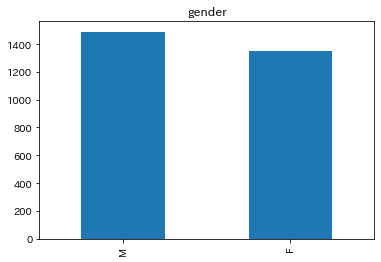

In [29]:
show_distribution(customer_new,   'gender')

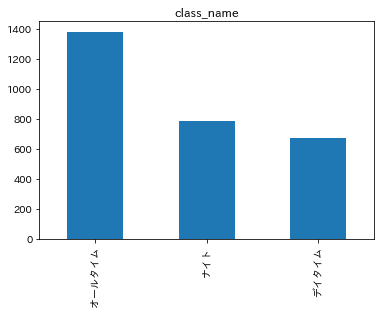

In [30]:
show_distribution(customer_new,   'class_name')

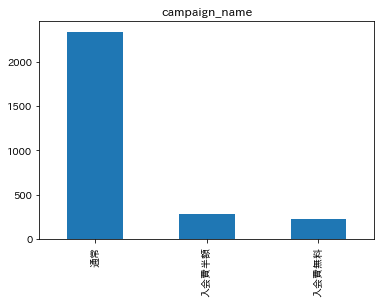

In [31]:
show_distribution(customer_new, 'campaign_name')

- 性別と会員クラスに関しては分布の変化がみられない
- キャンペーンは通常入会の割合が増えている　← キャンペーン中の入会者で途中退会した人が多いため

> ## ノック25:利用履歴データを集計しよう

In [32]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [33]:
# date を monthに変換
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['usemonth'] = use_log['usedate'].dt.strftime('%Y%m')

# 月、客ごとの利用回数
uselog_month = use_log.groupby(['usemonth', 'customer_id'], as_index=False).count()
uselog_month.rename(columns={'log_id': 'count'}, inplace=True)

# 平均値、中央値、最大値、最小値を客ごとに求める
customer_uselog = uselog_month.groupby('customer_id' ).agg(['mean', 'median', 'max', 'min'])['count']
customer_uselog = customer_uselog.reset_index(drop=False)
customer_uselog.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


> ## ノック26:利用履歴データから定期利用フラグを作成しよう

In [34]:
use_log['weekdate'] = use_log['usedate'].dt.weekday

uselog_weekday = use_log.groupby(['weekdate', 'usemonth', 'customer_id'], as_index=False).count()
uselog_weekday.rename(columns={'log_id': 'count'}, inplace=True)
del uselog_weekday['usedate']
uselog_weekday

,weekdate,usemonth,customer_id,count
0,0,201804,AS009013,2
1,0,201804,AS015739,5
2,0,201804,AS015746,2
3,0,201804,AS019860,5
4,0,201804,AS038564,1
...,...,...,...,...
93328,6,201903,TS982817,1
93329,6,201903,TS995299,3
93330,6,201903,TS995853,5
93331,6,201903,TS998593,1


In [35]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max( )[['customer_id', 'count']]
uselog_weekday['is_routine'] = 0
uselog_weekday['is_routine'] = uselog_weekday['is_routine'] .where(uselog_weekday['count']<4, 1)
uselog_weekday.head()

,customer_id,count,is_routine
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


> ## ノック27:顧客データと利用履歴データを結合しよう

In [36]:
customer_joined = pd.merge(customer_joined, customer_uselog, on='customer_id', how='left')
customer_joined = pd.merge(customer_joined, uselog_weekday, on='customer_id', how='left')
del customer_joined['count']
customer_joined.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,is_routine
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [37]:
customer_joined.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
is_routine          0
dtype: int64

> ## ノック28:会員期間を計算しよう


In [38]:
from dateutil.relativedelta import relativedelta

# Converts relative delta to months
def delta_to_years(x):
  return x.years*12 + x.months

customer_joined['membership_period'] = 0
customer_joined['calc_end_date'] = customer_joined['end_date'].fillna(pd.to_datetime('20190430'))
customer_joined['membership_period'] =  customer_joined.apply(lambda x: delta_to_years(relativedelta(x['calc_end_date'], x['start_date'])), axis=1)
customer_joined = customer_joined.drop('calc_end_date', axis=1)


`relativedelta(x['calc_end_date'], x['start_date']).months`
でやろうとしたら, トータルを月数に換算するのではなく, monthsの部分だけを返してきたので気を付ける

Text(0.5, 1.0, '会員期間 (ヶ月)')

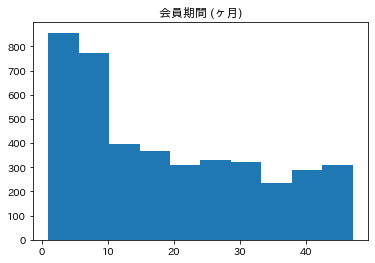

In [39]:
plt.hist(customer_joined['membership_period'])
plt.title('会員期間 (ヶ月)')

> ## ノック29:顧客行動の各種統計量を把握しよう


In [40]:
customer_joined[['mean', 'median', 'max', 'min', 'membership_period']].describe()

,mean,median,max,min,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269,18.835878
std,1.777533,1.874874,2.168959,1.951565,13.848148
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000,7.000000
50%,5.000000,5.000000,8.000000,3.000000,15.000000
75%,6.416667,6.500000,9.000000,4.000000,30.000000
max,12.000000,12.000000,14.000000,12.000000,47.000000


> ## ノック30:退会ユーザーと継続ユーザーの違いを把握しよう


In [41]:
# 継続中のユーザー
customer_joined.loc[customer_joined['is_deleted']==0].describe()

,is_deleted,price,mean,median,max,min,is_routine,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [42]:
# 退会済みのユーザー
customer_joined.loc[customer_joined['is_deleted']==1].describe()

,is_deleted,price,mean,median,max,min,is_routine,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


- 継続中のユーザーの方が利用回数が多く、会員期間も長く、定期的な利用が多いよう

入会キャンペーンで比べてみる

In [43]:
customer_joined.loc[customer_joined['campaign_name']=='通常'].describe()

,is_deleted,price,mean,median,max,min,is_routine,membership_period
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000
mean,0.232459,8530.327869,5.335142,5.284098,7.729508,3.075738,0.851148,21.988852
std,0.422469,1971.670853,1.753496,1.823022,2.094664,1.971884,0.356001,14.308502
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.333333,4.000000,7.000000,2.000000,1.000000,8.000000
50%,0.000000,7500.000000,5.000000,5.000000,8.000000,3.000000,1.000000,22.000000
75%,0.000000,10500.000000,6.250000,6.000000,9.000000,4.000000,1.000000,34.000000
max,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [44]:
customer_joined.loc[customer_joined['campaign_name']=='入会費半額'].describe()

,is_deleted,price,mean,median,max,min,is_routine,membership_period
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.566154,8679.230769,5.060504,4.876154,7.915385,2.613846,0.703077,12.798462
std,0.495986,1966.346136,1.577769,1.756687,2.243411,1.508106,0.457254,8.774227
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.000000,3.500000,7.000000,1.000000,0.000000,7.000000
50%,1.000000,10500.000000,4.904545,5.000000,8.000000,2.000000,1.000000,10.000000
75%,1.000000,10500.000000,6.000000,6.000000,9.000000,4.000000,1.000000,20.000000
max,1.000000,10500.000000,8.700000,9.000000,12.000000,7.000000,1.000000,33.000000


In [45]:
customer_joined.loc[customer_joined['campaign_name']=='入会費無料'].describe()

,is_deleted,price,mean,median,max,min,is_routine,membership_period
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.554878,8585.365854,5.680806,5.537602,8.288618,3.392276,0.731707,7.266260
std,0.497485,1946.020345,2.089488,2.238824,2.444086,2.232554,0.443522,4.432366
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.100000,4.000000,7.000000,1.000000,0.000000,4.000000
50%,1.000000,7500.000000,5.500000,5.000000,9.000000,3.000000,1.000000,6.000000
75%,1.000000,10500.000000,7.416667,7.500000,10.000000,5.000000,1.000000,11.000000
max,1.000000,10500.000000,10.000000,11.000000,13.000000,9.000000,1.000000,16.000000


- 通常入会者に比べてキャンペーン入会者は周期的な利用は少ない
- 利用回数は比較的高いのには驚いた.
- 会員期間の短さに関しては、そもそもキャンペーン開始が2018年あたりなので何とも言えない.

In [46]:
# 加工済みデータを保存
customer_joined.to_csv(PATH + 'customer_joined.csv' , index=False )